#### Домашнее задание 2  Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


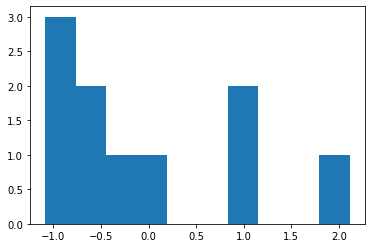

In [6]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

**1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [18]:
W / np.abs(W)
+1 / 1 = +
-1 / 1 = -
0 / 0 = nan

SyntaxError: cannot assign to operator (Temp/ipykernel_508/1529666467.py, line 2)

In [19]:
np.sign(0)

0

In [20]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [21]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 0.2763363   0.58781714 -1.33413448  1.31055838], error 3452.764279660518
Iter: 500, weights: [56.49269369  6.03250441  0.61467036  5.83041814], error 25.0666665730518
Iter: 1000, weights: [ 5.64949999e+01  6.22560777e+00 -1.10586149e-02  6.28890446e+00], error 24.925668060723535
Iter: 1500, weights: [56.495       6.26159587 -0.19354453  6.44267788], error 24.909251220714037
Iter: 2000, weights: [56.495       6.27516798 -0.25965254  6.49735871], error 24.906261883573656
Iter: 2500, weights: [56.495       6.28009326 -0.28346016  6.51701529], error 24.905564138800763
Iter: 3000, weights: [56.495       6.28186812 -0.29203015  6.52408921], error 24.905362016904
Iter: 3500, weights: [56.495       6.28250707 -0.29511489  6.52663534], error 24.905295617571877
Iter: 4000, weights: [56.495       6.28273706 -0.29622521  6.5275518 ], error 24.905272540796794
Iter: 4500, weights: [56.495       6.28281985 -0.29662486  6.52788167], error 24.90526434114892
Final MSE: 24.90526140357

array([56.495     ,  6.28284961, -0.29676855,  6.52800027])

**2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

In [22]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [23]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [24]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [25]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [26]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [27]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

**3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [28]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [29]:
X = standard_scale(X)

In [30]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [31]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [32]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [33]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 27979.272752767254
Iter: 500, error 3738.232217575069
Iter: 1000, error 518.6388255248817
Iter: 1500, error 90.72566724830708
Iter: 2000, error 33.811992742915194
Iter: 2500, error 26.236945851143123
Iter: 3000, error 25.228011523637203
Iter: 3500, error 25.093533811524274
Iter: 4000, error 25.075596872220995
Iter: 4500, error 25.07320268805145
Final MSE: 25.072882888141045
Wall time: 56.3 s


In [34]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 25.075236521110753
Iter: 500, error 25.75966944298366
Iter: 1000, error 25.7217958880477
Iter: 1500, error 25.405964155926654
Iter: 2000, error 25.781264588660264
Iter: 2500, error 25.849508285930284
Iter: 3000, error 25.465594348594173
Iter: 3500, error 25.642243353496802
Iter: 4000, error 25.588938594060807
Iter: 4500, error 25.50982716026745
Final MSE: 25.42193510057289
Wall time: 15.2 s


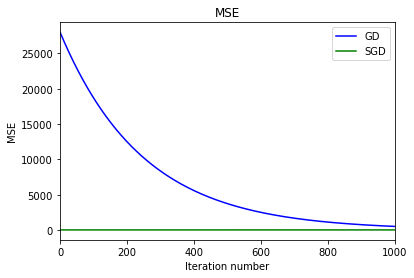

In [35]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [36]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

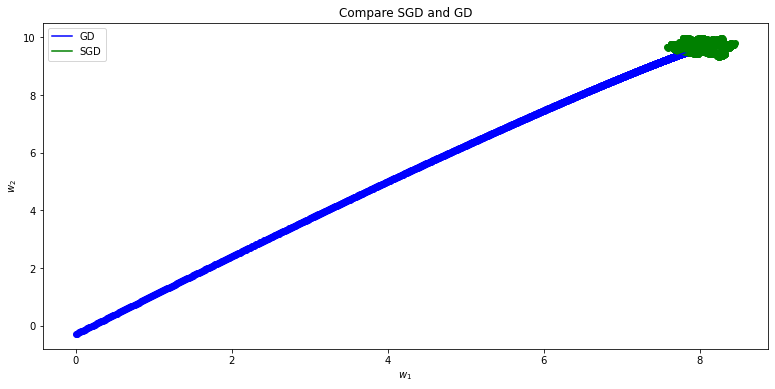

In [37]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()